# Limpieza de datos 

Abrimos el archivo en un data frame

In [18]:
import pandas as pd

# Lee el archivo txt en un DataFrame
df = pd.read_csv('data.txt')  # Puedes especificar el delimitador según sea necesario

df


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.00,7080,98,0.00,0,0,59.00,0.94
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.00,0,0,8.00,0.89
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.00,1920,50,0.00,0,0,56.00,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.00,0,0,8.00,0.63
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.00,0,0,8.00,0.63
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.00,0,0,8.00,0.63
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.00,0,0,15.00,0.51


### Mostrar duplicados y nulos 

In [19]:
def mostrar_duplicados(df):
    """
    Esta función toma un DataFrame de pandas y muestra las filas duplicadas en el DataFrame.
    
    Parámetros:
        - df: DataFrame de pandas
        
    Retorna:
        - DataFrame que contiene las filas duplicadas en el DataFrame de entrada.
    """
    duplicados = df[df.duplicated(keep=False)]
    return duplicados

def mostrar_valores_nulos(df):
    """
    Esta función toma un DataFrame de pandas y muestra los valores nulos en el DataFrame.
    
    Parámetros:
        - df: DataFrame de pandas
        
    Retorna:
        - DataFrame que contiene los valores nulos en el DataFrame de entrada.
    """
    valores_nulos = df[df.isnull().any(axis=1)]
    return valores_nulos

p = mostrar_valores_nulos(df)
p

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.00,0,0,8.00,0.89
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.00,0,0,8.00,0.76
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.00,0,0,8.00,0.71
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.00,0,0,8.00,0.68
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.00,0,0,18.00,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.00,0,0,8.00,0.63
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.00,0,0,8.00,0.63
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.00,0,0,8.00,0.63
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.00,0,0,15.00,0.51


No hay valores duplicados, hay varios valores nulos en la variable wip: Trabajo en progreso. Incluye la cantidad de elementos sin terminar.

## Remplazar valores nulos por N/A

In [ ]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Definir las variables independientes (X) y la variable dependiente (y)
X = df[['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']]
y = df['actual_productivity']

# Entrenar el modelo de regresión lineal
modelo.fit(X, y)

# Obtener los coeficientes y el término independiente
coeficientes = modelo.coef_
intercepto = modelo.intercept_

# Imprimir los resultados
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)


In [22]:
def reemplazar_nulos(df, valor_reemplazo="N/A"):
    """
    Esta función toma un DataFrame de pandas y reemplaza los valores nulos con un valor especificado.
    
    Parámetros:
        - df: DataFrame de pandas
        - valor_reemplazo: Valor con el que se reemplazarán los valores nulos (por defecto es "N/A")
        
    Retorna:
        - DataFrame con los valores nulos reemplazados.
    """
    df_reemplazado = df.fillna(valor_reemplazo)
    return df_reemplazado

df = reemplazar_nulos(df)

df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.00,7080,98,0.00,0,0,59.00,0.94
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,N/A,960,0,0.00,0,0,8.00,0.89
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.00,1920,50,0.00,0,0,56.00,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,N/A,960,0,0.00,0,0,8.00,0.63
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,N/A,960,0,0.00,0,0,8.00,0.63
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,N/A,960,0,0.00,0,0,8.00,0.63
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,N/A,1800,0,0.00,0,0,15.00,0.51


In [23]:
df.to_csv("datoslimpios.csv")

se observa si el formato de la fecha esta bien y si como esta formado 

In [27]:
import pandas as pd

# Intentar convertir la columna de fecha a un objeto de fecha
try:
    df['date'] = pd.to_datetime(df['date'])
    print("El formato de fecha es correcto.")
except ValueError:
    print("El formato de fecha es incorrecto.")

fecha = df['date'].iloc[0]
if fecha.day < 13:
    formato = "mes-día"
else:
    formato = "día-mes"
print("El formato de fecha es:", formato)



El formato de fecha es correcto.
El formato de fecha es: mes-día


### Autocorrelograma 

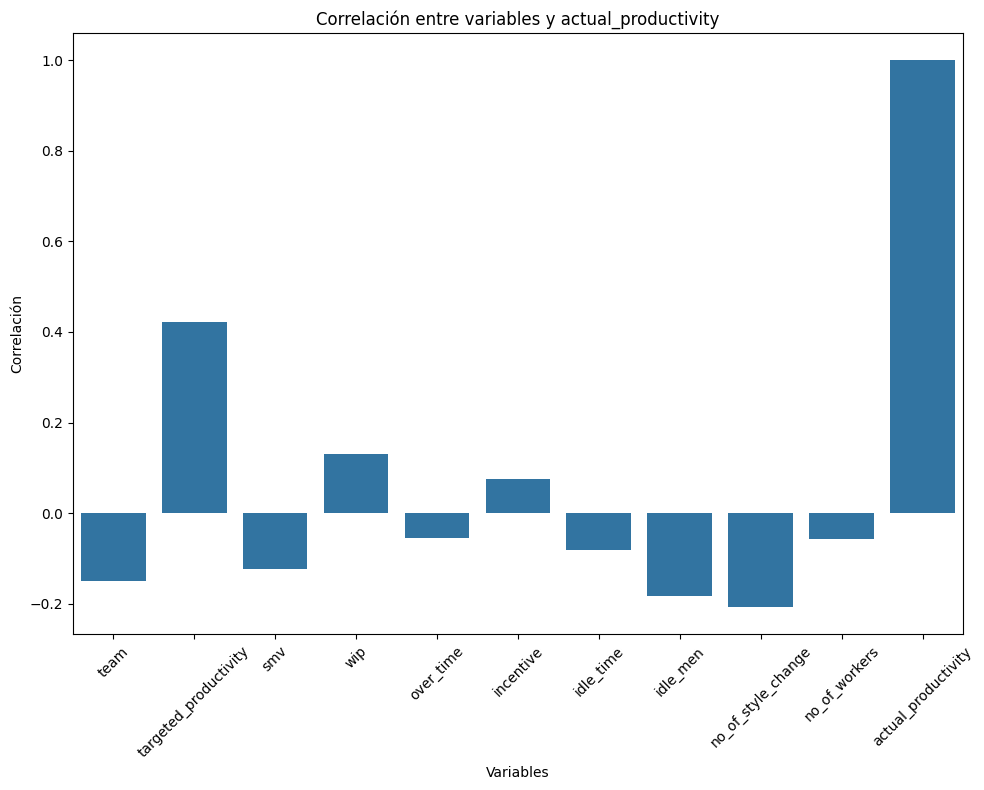

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame
# Carguemos el DataFrame
df = pd.read_csv("data.txt")

# Calcular la matriz de correlación
correlacion = df.corr(numeric_only=True)

# Seleccionar la columna 'actual_productivity' para visualizar su correlación con otras variables
correlacion_actual_productivity = correlacion['actual_productivity']

# Crear el gráfico de correlación
plt.figure(figsize=(10, 8))
sns.barplot(x=correlacion_actual_productivity.index, y=correlacion_actual_productivity.values)
plt.title('Correlación entre variables y actual_productivity')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()